# Importing libraries

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.optimize import minimize
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
import numpy as np
from numpy import mean, std
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import cohen_kappa_score, make_scorer
kappa_scorer = make_scorer(cohen_kappa_score)
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

# Importing data from Excel and creating initial dataset

In [13]:
excel_data = pd.read_excel(r'https://github.com/DanialShirazi/delay-prediction/raw/main/Input%20Dataset.xlsx',
                           sheet_name='dataset',index_col=0, engine='openpyxl')
raw_data = excel_data.values[:,0:67]
y = excel_data.label
std_data = StandardScaler().fit_transform(raw_data)

# Determining the optimal number of principal components for PCA

In [3]:
pca_k_scores =[]
for i in range (1,21):
    pca = PCA(n_components=i)
    pca_data = pca.fit_transform(std_data[:,0:65])
    data = pd.DataFrame(pca_data,index=excel_data.index)
    data = data.assign(concrete=std_data[:,[65]])
    data = data.assign(time=std_data[:,[66]])
    model = SVC()
    kernel = ['poly', 'rbf', 'sigmoid']
    C = [ 1.0, 2.0, 3.0,5.0,10.0, 0.1, 0.01]
    grid = dict(kernel=kernel,C=C)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                               cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(data, y)
    pca_k_scores.append([i,(1-grid_result.best_score_)])
pca_k_scores

[[1, 0.3018181818181819],
 [2, 0.1903030303030303],
 [3, 0.1333333333333333],
 [4, 0.1515151515151516],
 [5, 0.10909090909090913],
 [6, 0.11454545454545462],
 [7, 0.1260606060606061],
 [8, 0.1266666666666667],
 [9, 0.13212121212121208],
 [10, 0.13212121212121208],
 [11, 0.13818181818181818],
 [12, 0.1321212121212122],
 [13, 0.13818181818181818],
 [14, 0.13818181818181818],
 [15, 0.13818181818181818],
 [16, 0.13818181818181818],
 [17, 0.13818181818181818],
 [18, 0.14484848484848478],
 [19, 0.13818181818181818],
 [20, 0.13818181818181818]]

In [5]:
pca_k_scores =[]
for i in range (1,21):
    pca = PCA(n_components=i)
    pca_data = pca.fit_transform(std_data[:,0:65])
    data = pd.DataFrame(pca_data,index=excel_data.index)
    data = data.assign(concrete=std_data[:,[65]])
    data = data.assign(time=std_data[:,[66]])
    model = RandomForestClassifier(random_state=1)
    n_estimators = [50, 100, 120, 200]
    max_features = ['sqrt', 'log2']
    max_depth = [2,6,8,10]
    grid = dict(n_estimators=n_estimators,
                max_features=max_features,max_depth=max_depth)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(data, y)
    pca_k_scores.append(1-grid_result.best_score_)
pca_k_scores

[0.3284848484848484,
 0.1884848484848486,
 0.18060606060606055,
 0.18727272727272726,
 0.16909090909090907,
 0.18848484848484837,
 0.21272727272727276,
 0.19454545454545447,
 0.19999999999999984,
 0.20060606060606057,
 0.19333333333333336,
 0.20666666666666655,
 0.22484848484848485,
 0.21393939393939398,
 0.21939393939393925,
 0.23272727272727267,
 0.22545454545454535,
 0.20666666666666667,
 0.20181818181818179,
 0.22606060606060607]

In [6]:
pca_k_scores =[]
for i in range (1,21):
    pca = PCA(n_components=i)
    pca_data = pca.fit_transform(std_data[:,0:65])
    data = pd.DataFrame(pca_data,index=excel_data.index)
    data = data.assign(concrete=std_data[:,[65]])
    data = data.assign(time=std_data[:,[66]])
    model = GaussianNB()
    var_smoothing= np.logspace(0,-9, num=5)
    grid = dict(var_smoothing=var_smoothing)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                               cv=cv, scoring='f1_macro',error_score=0)
    grid_result = grid_search.fit(data, y)
    pca_k_scores.append(1-grid_result.best_score_)
pca_k_scores

[0.38943562610229276,
 0.17684784351451033,
 0.14100529100529102,
 0.16134038800705475,
 0.13107583774250442,
 0.12469135802469133,
 0.12469135802469133,
 0.12358024691358027,
 0.14007054673721342,
 0.1852380952380952,
 0.17786596119929454,
 0.17827160493827165,
 0.17206349206349203,
 0.18564373897707231,
 0.18564373897707231,
 0.18564373897707231,
 0.18564373897707231,
 0.1925573192239859,
 0.1925573192239859,
 0.1925573192239859]

# Feature extraction with PCA and creating the input dataset

In [21]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(std_data[:,0:65])
pca.explained_variance_ratio_
data = pd.DataFrame(pca_data,index=excel_data.index)
data = data.assign(concrete=std_data[:,[65]])
data = data.assign(time=std_data[:,[66]])

# Tuning hyperparameters of conventional machine learning classifiers using grid search algorithm

In [5]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [8]:
from sklearn.svm import SVC
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [ 1.0, 2.0, 3.0, 5.0, 10.0, 0.1, 0.01]
grid = dict(kernel=kernel,C=C)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(data, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.884374 using {'C': 1.0, 'kernel': 'sigmoid'}


In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
n_estimators = [50, 100, 120, 200]
max_features = ['sqrt', 'log2']
max_depth = [2,6,8,10]
grid = dict(n_estimators=n_estimators,
            max_features=max_features,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(data, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.802257 using {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [6]:
model =  GaussianNB()
var_smoothing= np.logspace(0,-9, num=5)
grid = dict(var_smoothing=var_smoothing)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(data, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.868924 using {'var_smoothing': 0.005623413251903491}


# Tuning hyperparameters of shallow ANNs using grid search algorithm

In [7]:
model = MLPClassifier(max_iter=1000,  random_state=1)
hidden_layer_sizes= [(7),(8),(9),(10)]
activation= ['tanh', 'relu','identity','logistic']
solver= ['sgd', 'adam','lbfgs']
alpha= [0.0001, 0.1, 0.5, 1, 0.7]
learning_rate= ['constant','adaptive','invscaling']
grid= dict(
hidden_layer_sizes=hidden_layer_sizes,
    activation=activation,
    solver=solver,
    alpha=alpha,
    learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(iid=False, estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(data, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.905291 using {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': 7, 'learning_rate': 'constant', 'solver': 'adam'}


# Finding the best architecture for proposed Deep-MLP-NN and Tuning its hyperparameters using grid search algorithm

In [5]:
layer_2= []
for a in range(7,10):
    for b in range(7,10):
        layer_2.append((a,b))

In [6]:
#2layer
model = MLPClassifier(max_iter=2000,  random_state=1)
hidden_layer_sizes= layer_2
activation= ['tanh', 'relu']
solver= ['sgd', 'adam','lbfgs']
alpha= [0.1, 1, 0.7]
learning_rate= ['constant','adaptive','invscaling']
grid= dict(
hidden_layer_sizes=hidden_layer_sizes,
    activation=activation,
    solver=solver,
    alpha=alpha,
    learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(iid=False, estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(data, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.926984 using {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (8, 9), 'learning_rate': 'constant', 'solver': 'adam'}


In [7]:
layer_3= []
for a in range(7,10):
    for b in range(7,10):
        for c in range(7,10):
            layer_3.append((a,b,c))

In [8]:
#3layer
model = MLPClassifier(max_iter=2000,  random_state=1)
hidden_layer_sizes= layer_3
activation= ['tanh', 'relu']
solver= ['adam','lbfgs']
alpha= [1, 0.7]
learning_rate= ['constant','adaptive']
grid= dict(
hidden_layer_sizes=hidden_layer_sizes,
    activation=activation,
    solver=solver,
    alpha=alpha,
    learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(iid=False, estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(data, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.915309 using {'activation': 'tanh', 'alpha': 0.7, 'hidden_layer_sizes': (7, 7, 8), 'learning_rate': 'constant', 'solver': 'adam'}


In [9]:
layer_4= []
for a in range(7,10):
    for b in range(7,10):
        for c in range(7,10):
            for d in range(7,10):
                layer_4.append((a,b,c,d))

In [10]:
#4layer
model = MLPClassifier(max_iter=2000,  random_state=1)
hidden_layer_sizes= layer_4
activation= ['tanh', 'relu']
solver= ['adam','lbfgs']
alpha= [1, 0.7]
learning_rate= ['constant','adaptive']
grid= dict(
hidden_layer_sizes=hidden_layer_sizes,
    activation=activation,
    solver=solver,
    alpha=alpha,
    learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(iid=False, estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(data, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.938095 using {'activation': 'tanh', 'alpha': 0.7, 'hidden_layer_sizes': (8, 8, 8, 7), 'learning_rate': 'constant', 'solver': 'adam'}


In [11]:
layer_5= []
for a in range(7,10):
    for b in range(7,10):
        for c in range(7,10):
            for d in range(7,10):
                 for e in range(7,10):
                        layer_5.append((a,b,c,d,e))

In [12]:
#5layer
model = MLPClassifier(max_iter=2000,  random_state=1)
hidden_layer_sizes= layer_5
activation= ['tanh']
solver= ['adam','lbfgs']
alpha= [ 0.7]
learning_rate= ['constant']
grid= dict(
hidden_layer_sizes=hidden_layer_sizes,
    activation=activation,
    solver=solver,
    alpha=alpha,
    learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(iid=False, estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(data, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.935767 using {'activation': 'tanh', 'alpha': 0.7, 'hidden_layer_sizes': (8, 7, 9, 7, 7), 'learning_rate': 'constant', 'solver': 'adam'}


In [13]:
layer_6= []
for a in range(7,10):
    for b in range(7,10):
        for c in range(7,10):
            for d in range(7,10):
                 for e in range(7,10):
                        for f in range(7,10):
                            layer_6.append((a,b,c,d,e,f))

In [14]:
#6layer
model = MLPClassifier(max_iter=2000,  random_state=1)
hidden_layer_sizes= layer_6
activation= ['tanh']
solver= ['adam']
alpha= [ 0.7]
learning_rate= ['constant']
grid= dict(
hidden_layer_sizes=hidden_layer_sizes,
    activation=activation,
    solver=solver,
    alpha=alpha,
    learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(iid=False, estimator=model, param_grid=grid, n_jobs=-1,
                           cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(data, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.937954 using {'activation': 'tanh', 'alpha': 0.7, 'hidden_layer_sizes': (8, 8, 8, 8, 8, 7), 'learning_rate': 'constant', 'solver': 'adam'}


# Training ML/DL algorithms

In [3]:
model_svm = SVC(C= 1.0, kernel='sigmoid')
model_rf = RandomForestClassifier(random_state=1, max_depth=8 , max_features='sqrt', n_estimators=200)
model_nb = GaussianNB(var_smoothing= 0.0056)
model_mlp_1layer = MLPClassifier(max_iter=1000,random_state=1, activation= 'tanh', alpha= 1, hidden_layer_sizes= (7), learning_rate= 'constant', solver= 'adam' )
model_mlp_2layer = MLPClassifier(max_iter=2000,random_state=1, activation= 'tanh', alpha= 1, hidden_layer_sizes= (8, 9), learning_rate= 'constant', solver= 'adam' )
model_mlp_3layer = MLPClassifier(max_iter=2000,random_state=1, activation= 'tanh', alpha= 0.7, hidden_layer_sizes= (7, 7, 8), learning_rate= 'constant', solver= 'adam' )
model_mlp_4layer = MLPClassifier(max_iter=2000,random_state=1, activation= 'tanh', alpha= 0.7, hidden_layer_sizes= (8, 8, 8, 7), learning_rate= 'constant', solver= 'adam' )
model_mlp_5layer = MLPClassifier(max_iter=2000,random_state=1, activation= 'tanh', alpha= 0.7, hidden_layer_sizes= (8, 7, 9, 7, 7), learning_rate= 'constant', solver= 'adam' )
model_mlp_6layer = MLPClassifier(max_iter=2000,random_state=1, activation= 'tanh', alpha= 0.7, hidden_layer_sizes= (8, 8, 8, 8, 8, 7), learning_rate= 'constant', solver= 'adam' )

# Evaluation of the proposed DL model and 5 shallow classifiers using 3-times repeated stratified 5-fold CV

## SVM

In [8]:
model=model_svm
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, data, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='f1_macro', cv=cv, n_jobs=-1)
print('f1_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='precision_macro', cv=cv, n_jobs=-1)
print('precision_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='recall_macro', cv=cv, n_jobs=-1)
print('recall_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring=kappa_scorer, cv=cv, n_jobs=-1)
print('kappa_scorer: %.4f (%.4f)' % (mean(scores), std(scores)))

Accuracy: 0.8909 (0.0629)
f1_macro: 0.8844 (0.0694)
precision_macro: 0.9056 (0.0648)
recall_macro: 0.8907 (0.0669)
kappa_scorer: 0.8337 (0.0973)


## NAIVE BAYES

In [9]:
model=model_nb
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, data, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='f1_macro', cv=cv, n_jobs=-1)
print('f1_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='precision_macro', cv=cv, n_jobs=-1)
print('precision_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='recall_macro', cv=cv, n_jobs=-1)
print('recall_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring=kappa_scorer, cv=cv, n_jobs=-1)
print('kappa_scorer: %.4f (%.4f)' % (mean(scores), std(scores)))

Accuracy: 0.8794 (0.0897)
f1_macro: 0.8689 (0.0967)
precision_macro: 0.9089 (0.0647)
recall_macro: 0.8778 (0.0900)
kappa_scorer: 0.8190 (0.1337)


## RANDOM FOREST

In [10]:
model=model_rf
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, data, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='f1_macro', cv=cv, n_jobs=-1)
print('f1_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='precision_macro', cv=cv, n_jobs=-1)
print('precision_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='recall_macro', cv=cv, n_jobs=-1)
print('recall_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring=kappa_scorer, cv=cv, n_jobs=-1)
print('kappa_scorer: %.4f (%.4f)' % (mean(scores), std(scores)))

Accuracy: 0.8309 (0.0912)
f1_macro: 0.8023 (0.1171)
precision_macro: 0.8322 (0.1275)
recall_macro: 0.8148 (0.1038)
kappa_scorer: 0.7413 (0.1408)


## Shallow MLP

In [12]:
model=model_mlp_1layer
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, data, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='f1_macro', cv=cv, n_jobs=-1)
print('f1_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='precision_macro', cv=cv, n_jobs=-1)
print('precision_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='recall_macro', cv=cv, n_jobs=-1)
print('recall_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring=kappa_scorer, cv=cv, n_jobs=-1)
print('kappa_scorer: %.4f (%.4f)' % (mean(scores), std(scores)))

Accuracy: 0.9188 (0.0676)
f1_macro: 0.9053 (0.0850)
precision_macro: 0.9311 (0.0616)
recall_macro: 0.9111 (0.0825)
kappa_scorer: 0.8758 (0.1048)


## 2 Hidden layer deep MLP

In [13]:
model=model_mlp_2layer
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, data, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='f1_macro', cv=cv, n_jobs=-1)
print('f1_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='precision_macro', cv=cv, n_jobs=-1)
print('precision_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='recall_macro', cv=cv, n_jobs=-1)
print('recall_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring=kappa_scorer, cv=cv, n_jobs=-1)
print('kappa_scorer: %.4f (%.4f)' % (mean(scores), std(scores)))

Accuracy: 0.9364 (0.0921)
f1_macro: 0.9270 (0.1064)
precision_macro: 0.9478 (0.0800)
recall_macro: 0.9315 (0.0998)
kappa_scorer: 0.9021 (0.1425)


## 3 Hidden layer deep MLP

In [14]:
model=model_mlp_3layer
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, data, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='f1_macro', cv=cv, n_jobs=-1)
print('f1_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='precision_macro', cv=cv, n_jobs=-1)
print('precision_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='recall_macro', cv=cv, n_jobs=-1)
print('recall_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring=kappa_scorer, cv=cv, n_jobs=-1)
print('kappa_scorer: %.4f (%.4f)' % (mean(scores), std(scores)))

Accuracy: 0.9242 (0.0642)
f1_macro: 0.9153 (0.0743)
precision_macro: 0.9337 (0.0649)
recall_macro: 0.9185 (0.0699)
kappa_scorer: 0.8844 (0.0985)


## Proposed 4 hidden layer MLP

In [15]:
model=model_mlp_4layer
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, data, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='f1_macro', cv=cv, n_jobs=-1)
print('f1_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='precision_macro', cv=cv, n_jobs=-1)
print('precision_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='recall_macro', cv=cv, n_jobs=-1)
print('recall_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring=kappa_scorer, cv=cv, n_jobs=-1)
print('kappa_scorer: %.4f (%.4f)' % (mean(scores), std(scores)))

Accuracy: 0.9436 (0.0676)
f1_macro: 0.9381 (0.0773)
precision_macro: 0.9585 (0.0519)
recall_macro: 0.9407 (0.0709)
kappa_scorer: 0.9136 (0.1035)


## 5 Hidden layer MLP

In [16]:
model=model_mlp_5layer
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, data, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='f1_macro', cv=cv, n_jobs=-1)
print('f1_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='precision_macro', cv=cv, n_jobs=-1)
print('precision_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='recall_macro', cv=cv, n_jobs=-1)
print('recall_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring=kappa_scorer, cv=cv, n_jobs=-1)
print('kappa_scorer: %.4f (%.4f)' % (mean(scores), std(scores)))

Accuracy: 0.9442 (0.0564)
f1_macro: 0.9358 (0.0679)
precision_macro: 0.9533 (0.0459)
recall_macro: 0.9407 (0.0640)
kappa_scorer: 0.9150 (0.0865)


## 6 Hidden layer deep MLP

In [18]:
model=model_mlp_6layer
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, data, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='f1_macro', cv=cv, n_jobs=-1)
print('f1_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='precision_macro', cv=cv, n_jobs=-1)
print('precision_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='recall_macro', cv=cv, n_jobs=-1)
print('recall_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring=kappa_scorer, cv=cv, n_jobs=-1)
print('kappa_scorer: %.4f (%.4f)' % (mean(scores), std(scores)))

Accuracy: 0.9436 (0.0676)
f1_macro: 0.9380 (0.0773)
precision_macro: 0.9563 (0.0532)
recall_macro: 0.9426 (0.0699)
kappa_scorer: 0.9139 (0.1034)


## Proposed model without parameter tuning

In [19]:
model=MLPClassifier()
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, data, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='f1_macro', cv=cv, n_jobs=-1)
print('f1_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='precision_macro', cv=cv, n_jobs=-1)
print('precision_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring='recall_macro', cv=cv, n_jobs=-1)
print('recall_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data, y, scoring=kappa_scorer, cv=cv, n_jobs=-1)
print('kappa_scorer: %.4f (%.4f)' % (mean(scores), std(scores)))

Accuracy: 0.8727 (0.0713)
f1_macro: 0.8446 (0.0738)
precision_macro: 0.8893 (0.0608)
recall_macro: 0.8593 (0.0551)
kappa_scorer: 0.7694 (0.1189)


## Proposed model without PCA

In [20]:
model=model_mlp_4layer
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, std_data, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, std_data, y, scoring='f1_macro', cv=cv, n_jobs=-1)
print('f1_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, std_data, y, scoring='precision_macro', cv=cv, n_jobs=-1)
print('precision_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, std_data, y, scoring='recall_macro', cv=cv, n_jobs=-1)
print('recall_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, std_data, y, scoring=kappa_scorer, cv=cv, n_jobs=-1)
print('kappa_scorer: %.4f (%.4f)' % (mean(scores), std(scores)))

Accuracy: 0.8048 (0.0819)
f1_macro: 0.7793 (0.0898)
precision_macro: 0.8385 (0.0894)
recall_macro: 0.7833 (0.0862)
kappa_scorer: 0.7004 (0.1256)


## Proposed model without projrct specifications

In [29]:
model=model_mlp_4layer
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, data_risk, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data_risk, y, scoring='f1_macro', cv=cv, n_jobs=-1)
print('f1_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data_risk, y, scoring='precision_macro', cv=cv, n_jobs=-1)
print('precision_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data_risk, y, scoring='recall_macro', cv=cv, n_jobs=-1)
print('recall_macro: %.4f (%.4f)' % (mean(scores), std(scores)))
scores = cross_val_score(model, data_risk, y, scoring=kappa_scorer, cv=cv, n_jobs=-1)
print('kappa_scorer: %.4f (%.4f)' % (mean(scores), std(scores)))

Accuracy: 0.8370 (0.0805)
f1_macro: 0.8144 (0.0918)
precision_macro: 0.8678 (0.0728)
recall_macro: 0.8222 (0.0877)
kappa_scorer: 0.7517 (0.1226)


# RF feature importance score

Feature: 0, Score: 0.01022
Feature: 1, Score: 0.01148
Feature: 2, Score: 0.10144
Feature: 3, Score: 0.02433
Feature: 4, Score: 0.03648
Feature: 5, Score: 0.01203
Feature: 6, Score: 0.00621
Feature: 7, Score: 0.00510
Feature: 8, Score: 0.00962
Feature: 9, Score: 0.02747
Feature: 10, Score: 0.02113
Feature: 11, Score: 0.02962
Feature: 12, Score: 0.02872
Feature: 13, Score: 0.02957
Feature: 14, Score: 0.00541
Feature: 15, Score: 0.00363
Feature: 16, Score: 0.04294
Feature: 17, Score: 0.03756
Feature: 18, Score: 0.02327
Feature: 19, Score: 0.03056
Feature: 20, Score: 0.00485
Feature: 21, Score: 0.03830
Feature: 22, Score: 0.00587
Feature: 23, Score: 0.00447
Feature: 24, Score: 0.01442
Feature: 25, Score: 0.01517
Feature: 26, Score: 0.00816
Feature: 27, Score: 0.00271
Feature: 28, Score: 0.01018
Feature: 29, Score: 0.00418
Feature: 30, Score: 0.01452
Feature: 31, Score: 0.00274
Feature: 32, Score: 0.00671
Feature: 33, Score: 0.02459
Feature: 34, Score: 0.00578
Feature: 35, Score: 0.00368
Fe

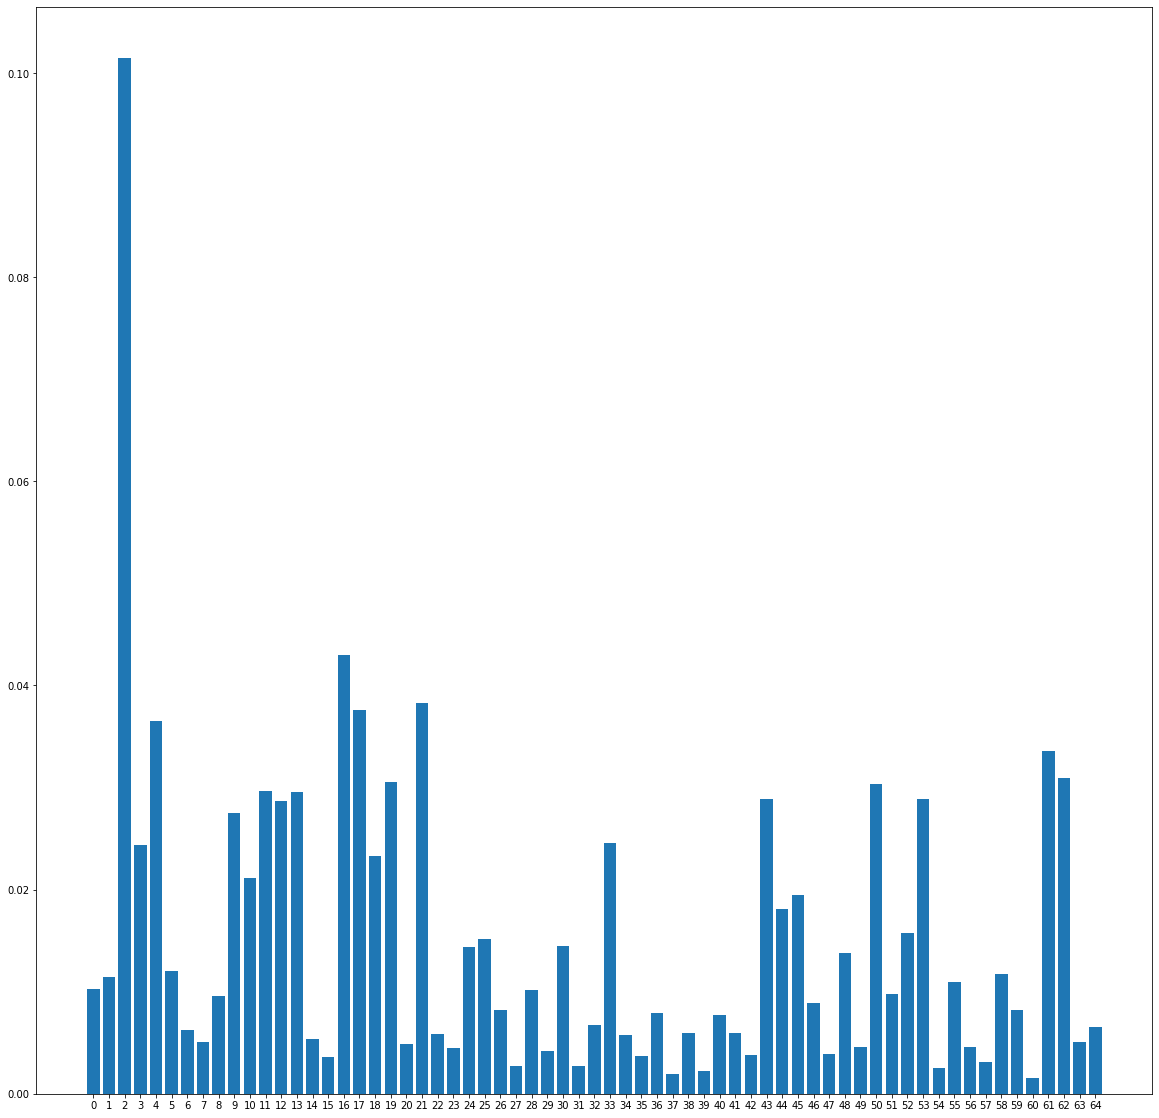

In [15]:
import matplotlib.pyplot as plt
model = RandomForestClassifier(random_state=42)
# fit the model
#model_rf1.fit(std_data[:,:-2], y)
model.fit(std_data[:,:-2], y)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(20,20))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(0,65))
plt.show()

# Confusion matrices

In [ ]:
class_names = ["<50% delay","50%–100% delay",">100%delay"]
data=np.array(data)
target =np.array(y)
labels, counts = np.unique(target, return_counts=True)

In [27]:
def evaluate_model(data_x, data_y):
    k_fold = KFold(5, shuffle=True, random_state=1)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        # Fit the classifier
        classifier = model_mlp_4layer.fit(train_x, train_y)

        # Predict the labels of the test set samples
        predicted_labels = classifier.predict(test_x)

        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets, test_y)

    return predicted_targets, actual_targets

In [28]:
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    plt.show()

    # Plot normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()

In [29]:
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

In [30]:
predicted_target, actual_target = evaluate_model(data, target)

## 5 confusion matrices

Confusion matrix, without normalization


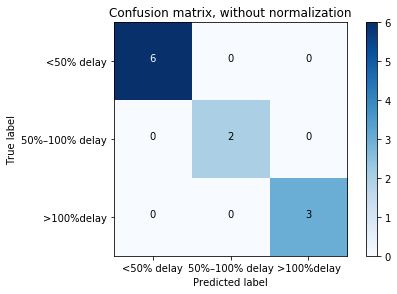

Normalized confusion matrix


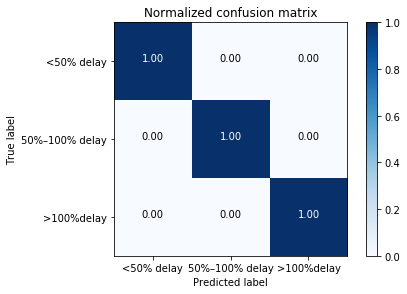

In [32]:
#step1
plot_confusion_matrix(predicted_target[:11], actual_target[:11])

Confusion matrix, without normalization


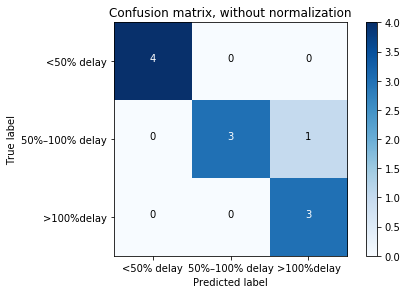

Normalized confusion matrix


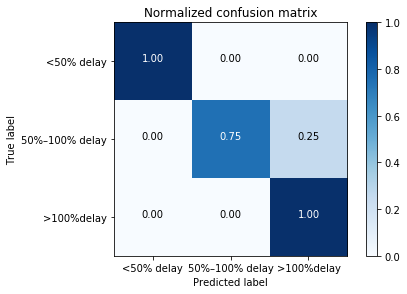

In [33]:
#step2
plot_confusion_matrix(predicted_target[11:22], actual_target[11:22])

Confusion matrix, without normalization


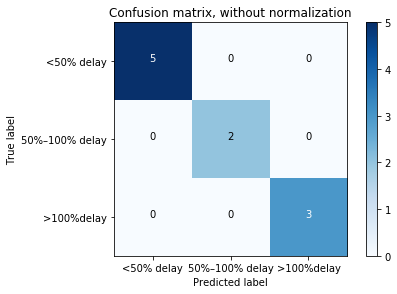

Normalized confusion matrix


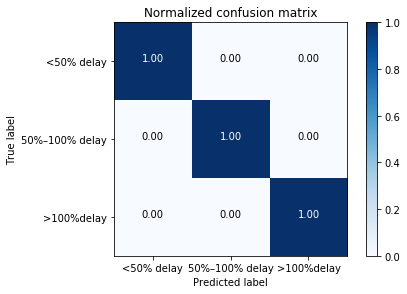

In [34]:
#step3
plot_confusion_matrix(predicted_target[22:32], actual_target[22:32])

Confusion matrix, without normalization


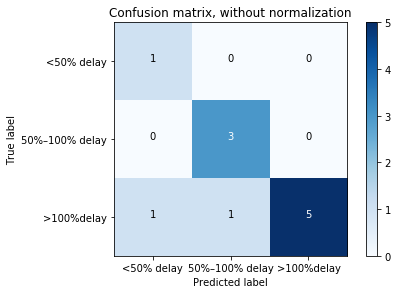

Normalized confusion matrix


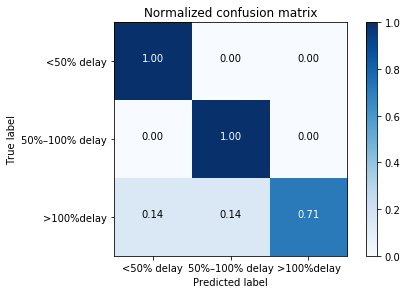

In [35]:
#step4
plot_confusion_matrix(predicted_target[32:43], actual_target[32:43])

Confusion matrix, without normalization


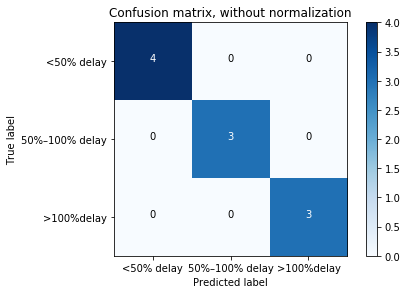

Normalized confusion matrix


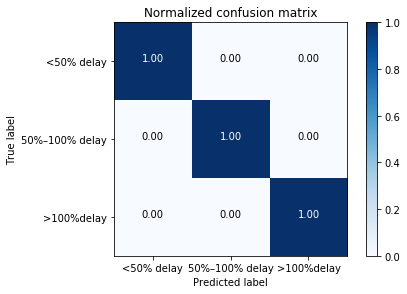

In [36]:
#step5
plot_confusion_matrix(predicted_target[43:53], actual_target[43:53])

## Combination of all confusion matrices

Confusion matrix, without normalization


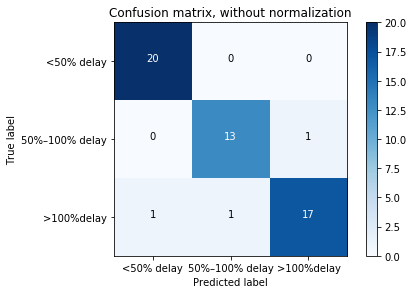

Normalized confusion matrix


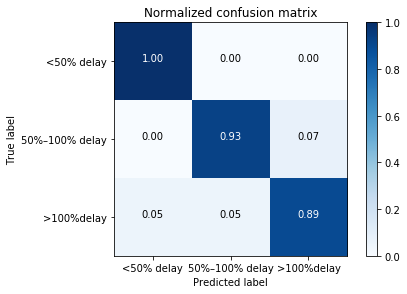

In [37]:
plot_confusion_matrix(predicted_target, actual_target)